In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/sande/OneDrive/Desktop/shacklabs project/amz_com-ecommerce_sample.csv',encoding='latin-1')  # importing dataset

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df.shape

(20000, 15)

In [5]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [6]:
df.drop(['uniq_id','crawl_timestamp','product_url','product_category_tree','image', 'is_FK_Advantage_product', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],axis=1,inplace=True)   # dropping features as not required

In [7]:
df.head()

,product_name,pid,retail_price,discounted_price,description
0,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,982,438,Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32143,29121,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,SHOEH4GRSUBJGZXE,991,551,Key Features of AW Bellies Sandals Wedges Heel...
3,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,694,325,Key Features of Alisha Solid Women's Cycling S...
4,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,208,258,Specifications of Sicons All Purpose Arnica Do...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      20000 non-null  object
 1   pid               20000 non-null  object
 2   retail_price      20000 non-null  int64 
 3   discounted_price  20000 non-null  int64 
 4   description       19998 non-null  object
dtypes: int64(2), object(3)
memory usage: 781.4+ KB


In [9]:
df.isnull().sum()  #checking null values

product_name        0
pid                 0
retail_price        0
discounted_price    0
description         2
dtype: int64

In [10]:
df['description'].fillna('No Description',inplace=True) # filling null values

In [11]:
df.isnull().sum()

product_name        0
pid                 0
retail_price        0
discounted_price    0
description         0
dtype: int64

In [12]:
df[df['description']=='No Description']

,product_name,pid,retail_price,discounted_price,description
553,Ozel Studio Casual Sleeveless Printed Women's Top,TOPEYV38KYVJKM54,1278,781,No Description
17299,AMORE ABSTRACT CUSHIONS COVER,CPCE2ZME2P7BMJFB,483,368,No Description


In [13]:
# for understanding product on which website it is
df['product_site']='amazon'

In [14]:
df.head()

,product_name,pid,retail_price,discounted_price,description,product_site
0,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,982,438,Key Features of Alisha Solid Women's Cycling S...,amazon
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32143,29121,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,amazon
2,AW Bellies,SHOEH4GRSUBJGZXE,991,551,Key Features of AW Bellies Sandals Wedges Heel...,amazon
3,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,694,325,Key Features of Alisha Solid Women's Cycling S...,amazon
4,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,208,258,Specifications of Sicons All Purpose Arnica Do...,amazon


In [15]:
# importing flipkart data
df1=pd.read_csv('C:/Users/sande/OneDrive/Desktop/shacklabs project/flipkart_com-ecommerce_sample.csv')

In [16]:
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [17]:
df1.shape

(20000, 15)

In [18]:
# dropping features as not required
df1.drop(['uniq_id','crawl_timestamp','product_url','product_category_tree','image','is_FK_Advantage_product','product_rating','overall_rating','brand','product_specifications'],axis=1,inplace=True)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      20000 non-null  object 
 1   pid               20000 non-null  object 
 2   retail_price      19922 non-null  float64
 3   discounted_price  19922 non-null  float64
 4   description       19998 non-null  object 
dtypes: float64(2), object(3)
memory usage: 781.4+ KB


In [20]:
df1.head()

,product_name,pid,retail_price,discounted_price,description
0,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...
3,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,Key Features of Alisha Solid Women's Cycling S...
4,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,Specifications of Sicons All Purpose Arnica Do...


In [21]:
df1.isnull().sum() # outliers detected

product_name         0
pid                  0
retail_price        78
discounted_price    78
description          2
dtype: int64

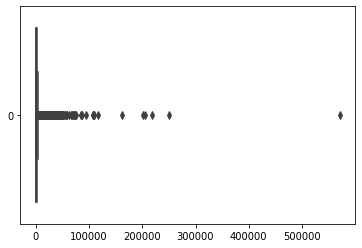

In [22]:
sns.boxplot(df1['retail_price'],orient='h')
plt.show()

In [23]:
out=df1['retail_price'].mean()+(3*df1['retail_price'].std()) # identifying range for detecting outlier by emperical formula

In [24]:
df1[df1['retail_price']>out]

,product_name,pid,retail_price,discounted_price,description
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
7,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGYGHFUEXN,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
16,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGAYAEPRCG,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
19,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGWRGG3J6Q,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
108,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,WATEA6UGFGKZKDJC,107750.0,107750.0,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...
...,...,...,...,...,...
18596,Springwel Single Spring Mattress,BEMEEZ6KMVZYAC7G,45864.0,37034.0,Specifications of Springwel Single Spring Matt...
18650,Ethnic Handicrafts Solid Wood Queen Bed,BDDEH29DNAN4AKYH,39999.0,24999.0,Key Features of Ethnic Handicrafts Solid Wood ...
18662,Ethnic Handicrafts Solid Wood Queen Bed,BDDEH29D335NNVSK,39999.0,24999.0,Key Features of Ethnic Handicrafts Solid Wood ...
18670,Ethnic Handicrafts Solid Wood Single Bed,BDDEH29EWHWRAPWG,36999.0,24999.0,Key Features of Ethnic Handicrafts Solid Wood ...


In [25]:
df1[df1['retail_price'].isnull()]

,product_name,pid,retail_price,discounted_price,description
12,Sicons All Purpose Tea Tree Dog Shampoo,PSOEH3ZYYFETGCCD,NaN,NaN,Specifications of Sicons All Purpose Tea Tree ...
21,Alisha Solid Women's Cycling Shorts,SRTEH2FD3ANFFMHP,NaN,NaN,Alisha Solid Women's Cycling Shorts - Buy Blac...
76,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,Key Features of Eurospa Cotton Terry Face Towe...
812,Fundoo T Printed Men's Track Suit,TKSED5CFETHWMD6N,NaN,NaN,Fundoo T Printed Men's Track Suit\n ...
1318,Techware Microwavable Tea Cups WF13115 - Purpl...,CNSEH3GZGG6VYT54,NaN,NaN,Key Features of Techware Microwavable Tea Cups...
...,...,...,...,...,...
16762,Muchmore Alloy Copper Charm Bracelet,BBAEDBQ8T2FKDWZ3,NaN,NaN,Muchmore Alloy Copper Charm Bracelet\n ...
17634,FRICTION Men's Vest,VESEGWKDWA6WV6UY,NaN,NaN,Key Features of FRICTION Men's Vest Graphic pr...
19543,Karishma Women's A-line Dress,DREDZZTUSAHPHGUS,NaN,NaN,Karishma Women's A-line Dress\n ...
19599,L'appel Du Vide Women's Shift Dress,DREEBMGNXJWYBEKS,NaN,NaN,L'appel Du Vide Women's Shift Dress - Buy Red ...


In [26]:
df1['retail_price'].fillna(0,inplace=True) # replacing null values with 0

In [27]:
df1['discounted_price'].fillna(0,inplace=True)  # replacing null values with 0

In [28]:
df1.isnull().sum()

product_name        0
pid                 0
retail_price        0
discounted_price    0
description         2
dtype: int64

In [29]:
df1['description'].fillna('No Description',inplace=True)   # replacing null values

In [30]:
# for understanding product on which website it is
df1['product_site']='flipkart'

In [31]:
df1.isnull().sum()

product_name        0
pid                 0
retail_price        0
discounted_price    0
description         0
product_site        0
dtype: int64

In [32]:
df.isnull().sum()

product_name        0
pid                 0
retail_price        0
discounted_price    0
description         0
product_site        0
dtype: int64

In [33]:
df1.head()

,product_name,pid,retail_price,discounted_price,description,product_site
0,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,flipkart
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,flipkart
2,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,flipkart
3,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,flipkart
4,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,flipkart


In [34]:
df.duplicated().sum() # identyfing duplicate records

0

In [35]:
df1.duplicated().sum()  # identyfing duplicate records

0

In [36]:
df.shape

(20000, 6)

In [37]:
df1.shape

(20000, 6)

In [38]:
# conacatinating both data
df=pd.concat([df,df1],ignore_index=True)

In [39]:
df.shape

(40000, 6)

In [40]:
df.head()

,product_name,pid,retail_price,discounted_price,description,product_site
0,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,982.0,438.0,Key Features of Alisha Solid Women's Cycling S...,amazon
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32143.0,29121.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,amazon
2,AW Bellies,SHOEH4GRSUBJGZXE,991.0,551.0,Key Features of AW Bellies Sandals Wedges Heel...,amazon
3,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,694.0,325.0,Key Features of Alisha Solid Women's Cycling S...,amazon
4,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,208.0,258.0,Specifications of Sicons All Purpose Arnica Do...,amazon


In [41]:
# shuffling data to mix
df=df.sample(frac=1).reset_index(drop=True)

In [42]:
df.head()

,product_name,pid,retail_price,discounted_price,description,product_site
0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,NKCEBVFYZHDYZGHD,584.0,345.0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,amazon
1,Yuccabe Italia Plant Container Set,PCSE4TF4YFQR3CRK,2598.0,1299.0,Buy Yuccabe Italia Plant Container Set for Rs....,flipkart
2,Accessory Mart RD Car Mat Renault Duster,CRTECYY4VY3MU5HR,5493.0,3848.0,Buy Accessory Mart RD Car Mat Renault Duster f...,amazon
3,Creez Printed Women's Abstract Fractal Print C...,TGTEJVS3AV9EJW7F,1499.0,899.0,Key Features of Creez Printed Women's Abstract...,flipkart
4,Jocular Metal Necklace,NKCE2MABAGBNHHYA,788.0,305.0,Jocular Metal Necklace - Buy Jocular Metal Nec...,amazon


In [43]:
df[df['product_name']=="Penny Pro Women's T-Shirt Bra"]  # same data the difference is only amazon and flipkart

,product_name,pid,retail_price,discounted_price,description,product_site
7818,Penny Pro Women's T-Shirt Bra,BRAEBYZFHMGHXZ2X,871.0,964.0,Penny Pro Women's T-Shirt Bra - Buy Peach Red ...,amazon
39716,Penny Pro Women's T-Shirt Bra,BRAEBYZFHMGHXZ2X,875.0,875.0,Penny Pro Women's T-Shirt Bra - Buy Peach Red ...,flipkart


In [44]:
df[df['product_name']=='Tenda TE-4G302']   # same data the difference is only amazon and flipkart

,product_name,pid,retail_price,discounted_price,description,product_site
10043,Tenda TE-4G302,RTRDZK8XZBQDJ35U,3496.0,4148.0,Buy Tenda TE-4G302 only for Rs. 2585 from Flip...,amazon
16962,Tenda TE-4G302,RTRDZK8XZBQDJ35U,3500.0,3399.0,Buy Tenda TE-4G302 only for Rs. 2585 from Flip...,flipkart


In [45]:
# to make content based filtering 
df['product_name']=df['product_name']+' '+df['pid']+' '+df['product_site']

In [46]:
df.head()

,product_name,pid,retail_price,discounted_price,description,product_site
0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,NKCEBVFYZHDYZGHD,584.0,345.0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,amazon
1,Yuccabe Italia Plant Container Set PCSE4TF4YFQ...,PCSE4TF4YFQR3CRK,2598.0,1299.0,Buy Yuccabe Italia Plant Container Set for Rs....,flipkart
2,Accessory Mart RD Car Mat Renault Duster CRTEC...,CRTECYY4VY3MU5HR,5493.0,3848.0,Buy Accessory Mart RD Car Mat Renault Duster f...,amazon
3,Creez Printed Women's Abstract Fractal Print C...,TGTEJVS3AV9EJW7F,1499.0,899.0,Key Features of Creez Printed Women's Abstract...,flipkart
4,Jocular Metal Necklace NKCE2MABAGBNHHYA amazon,NKCE2MABAGBNHHYA,788.0,305.0,Jocular Metal Necklace - Buy Jocular Metal Nec...,amazon


In [47]:
df['product_name'][0]

'Freshme Fashion Jewellery Rhodium Plated Zinc Necklace NKCEBVFYZHDYZGHD amazon'

In [48]:
# deleting extra data 
df.drop(['pid','product_site'],axis=1,inplace=True)

In [49]:
df.head()

,product_name,retail_price,discounted_price,description
0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,584.0,345.0,Freshme Fashion Jewellery Rhodium Plated Zinc ...
1,Yuccabe Italia Plant Container Set PCSE4TF4YFQ...,2598.0,1299.0,Buy Yuccabe Italia Plant Container Set for Rs....
2,Accessory Mart RD Car Mat Renault Duster CRTEC...,5493.0,3848.0,Buy Accessory Mart RD Car Mat Renault Duster f...
3,Creez Printed Women's Abstract Fractal Print C...,1499.0,899.0,Key Features of Creez Printed Women's Abstract...
4,Jocular Metal Necklace NKCE2MABAGBNHHYA amazon,788.0,305.0,Jocular Metal Necklace - Buy Jocular Metal Nec...


In [50]:
df['product_name'][1]

'Yuccabe Italia Plant Container Set PCSE4TF4YFQR3CRK flipkart'

In [51]:
# nlp Text Processing

In [52]:
# importing nlp libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [53]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
ps=PorterStemmer() # stemming te words

In [56]:
def func4(text):
    text=text.lower()   # lower the text
    text=nltk.word_tokenize(text)  # convert that text into words
    y=[]
    for i in text:
        if i.isalnum():  # Taking only those words which is aplha numeric
            y.append(i)   # storing in list
    z=[]
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:  # taking only those words which are not in stopwords and also remove the special character
            z.append(i)                  # storing in new list
    l=[]
    for i in z:
        l.append(ps.stem(i))  # applying stemming
    return ' '.join(l)         # converting list into text again

In [57]:
df['porter_description']=df['description'].apply(func4)

In [58]:
df.head()

,product_name,retail_price,discounted_price,description,porter_description
0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,584.0,345.0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,freshm fashion jewelleri rhodium plate zinc ne...
1,Yuccabe Italia Plant Container Set PCSE4TF4YFQ...,2598.0,1299.0,Buy Yuccabe Italia Plant Container Set for Rs....,buy yuccab italia plant contain set onlin yucc...
2,Accessory Mart RD Car Mat Renault Duster CRTEC...,5493.0,3848.0,Buy Accessory Mart RD Car Mat Renault Duster f...,buy accessori mart rd car mat renault duster o...
3,Creez Printed Women's Abstract Fractal Print C...,1499.0,899.0,Key Features of Creez Printed Women's Abstract...,key featur creez print women abstract fractal ...
4,Jocular Metal Necklace NKCE2MABAGBNHHYA amazon,788.0,305.0,Jocular Metal Necklace - Buy Jocular Metal Nec...,jocular metal necklac buy jocular metal neckla...


In [59]:
lemmatizer=WordNetLemmatizer()

In [60]:
def func5(text):
  text=text.lower()     # lower the text
  text=nltk.word_tokenize(text)       # convert that text into words
  j=[]
  for i in text:
    if i.isalnum():    # Taking only those words which is aplha numeric
      j.append(i)      # storing in list
  k=[]
  for i in j:
    if i not in stopwords.words('english') and i not in string.punctuation:    # taking only those words which are not in stopwords and also remove the special character
      k.append(i)     # storing in new list
  l=[]
  for i in k:
    l.append(lemmatizer.lemmatize(i))  # applying lemmatizer
  return ' '.join(l)   # converting list into text again

In [61]:
df['lemmatize_description']=df['description'].apply(func5)

In [62]:
df['porter_description'][9]

'tsg yuth diva collect alloy necklac buy tsg yuth diva collect alloy necklac rs 349 genuin product 30 day replac guarante free ship cash deliveri'

In [63]:
df['lemmatize_description'][9]

'tsg yuth diva collection alloy necklace buy tsg yuth diva collection alloy necklace r 349 genuine product 30 day replacement guarantee free shipping cash delivery'

In [64]:
df.head()

,product_name,retail_price,discounted_price,description,porter_description,lemmatize_description
0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,584.0,345.0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,freshm fashion jewelleri rhodium plate zinc ne...,freshme fashion jewellery rhodium plated zinc ...
1,Yuccabe Italia Plant Container Set PCSE4TF4YFQ...,2598.0,1299.0,Buy Yuccabe Italia Plant Container Set for Rs....,buy yuccab italia plant contain set onlin yucc...,buy yuccabe italia plant container set online ...
2,Accessory Mart RD Car Mat Renault Duster CRTEC...,5493.0,3848.0,Buy Accessory Mart RD Car Mat Renault Duster f...,buy accessori mart rd car mat renault duster o...,buy accessory mart rd car mat renault duster o...
3,Creez Printed Women's Abstract Fractal Print C...,1499.0,899.0,Key Features of Creez Printed Women's Abstract...,key featur creez print women abstract fractal ...,key feature creez printed woman abstract fract...
4,Jocular Metal Necklace NKCE2MABAGBNHHYA amazon,788.0,305.0,Jocular Metal Necklace - Buy Jocular Metal Nec...,jocular metal necklac buy jocular metal neckla...,jocular metal necklace buy jocular metal neckl...


In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer # convert text to vector,here we take only top 5000 words.

In [66]:
# using countvectorizer using porter stemming
countvect=CountVectorizer(max_features=5000)
vectors1=countvect.fit_transform(df['porter_description']).toarray()

In [67]:
countvect.get_feature_names()  #semantic relation not identified

['00',
 '001',
 '01',
 '03',
 '04',
 '05',
 '10',
 '100',
 '1000',
 '10000',
 '10000mah',
 '101',
 '1049',
 '105cm',
 '1070',
 '10796',
 '1080p',
 '1095',
 '1099',
 '11',
 '110',
 '1100',
 '110db',
 '1149',
 '1150',
 '1195',
 '1199',
 '12',
 '120',
 '1200',
 '120cm',
 '121',
 '122',
 '1249',
 '125',
 '1250',
 '129',
 '1295',
 '1299',
 '12cm',
 '12v',
 '12w',
 '13',
 '130',
 '1300',
 '1320',
 '1332',
 '1349',
 '135',
 '1350',
 '135cm',
 '1399',
 '14',
 '140',
 '1400',
 '1449',
 '145',
 '149',
 '1495',
 '1499',
 '14k',
 '15',
 '150',
 '1500',
 '150cm',
 '150ml',
 '152',
 '153',
 '154',
 '1550',
 '159',
 '1595',
 '1599',
 '16',
 '160',
 '1600',
 '165',
 '1685',
 '169',
 '1699',
 '16a',
 '17',
 '170',
 '1700',
 '1749',
 '175',
 '179',
 '1795',
 '1799',
 '18',
 '180',
 '1800',
 '185',
 '189',
 '1895',
 '1899',
 '18ct',
 '18k',
 '18kt',
 '18w',
 '19',
 '190',
 '1900',
 '1920',
 '195',
 '1950',
 '199',
 '1995',
 '1999',
 '1choli',
 '1pc',
 '1x',
 '1year',
 '20',
 '200',
 '2000',
 '2005',
 '20

In [68]:
# using countvectorizer using lemmatizer stemming
countvect1=CountVectorizer(max_features=5000)
vectors2=countvect1.fit_transform(df['lemmatize_description']).toarray()

In [69]:
countvect1.get_feature_names() #semantic relation not identified

['001',
 '01',
 '03',
 '04',
 '10',
 '100',
 '1000',
 '10000',
 '10000mah',
 '1049',
 '105cms',
 '1080p',
 '1095',
 '1099',
 '11',
 '110',
 '1100',
 '110db',
 '1149',
 '1150',
 '1195',
 '1199',
 '12',
 '120',
 '1200',
 '120cms',
 '121',
 '122',
 '1249',
 '125',
 '1250',
 '1295',
 '1299',
 '12cm',
 '12v',
 '13',
 '130',
 '1332',
 '135',
 '135cms',
 '1399',
 '14',
 '140',
 '1400',
 '1449',
 '145',
 '149',
 '1499',
 '14k',
 '15',
 '150',
 '1500',
 '150cms',
 '152',
 '154',
 '159',
 '1595',
 '1599',
 '16',
 '160',
 '165',
 '1685',
 '169',
 '1699',
 '16a',
 '17',
 '170',
 '1700',
 '1749',
 '175',
 '179',
 '1795',
 '1799',
 '18',
 '180',
 '1800',
 '189',
 '1895',
 '1899',
 '18ct',
 '18k',
 '18kt',
 '18w',
 '19',
 '190',
 '1900',
 '1920s',
 '195',
 '199',
 '1995',
 '1999',
 '1x',
 '20',
 '200',
 '2000',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '200gm',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '206',
 '2099',
 '21',
 '210',
 '213',
 '219',
 '2199',
 '22',
 '220',
 '

In [70]:
# using tfidf using porter stemming
tfidf = TfidfVectorizer(max_features=5000)
vectors5=tfidf.fit_transform(df['porter_description']).toarray()

In [71]:
tfidf.get_feature_names()

['00',
 '001',
 '01',
 '03',
 '04',
 '05',
 '10',
 '100',
 '1000',
 '10000',
 '10000mah',
 '101',
 '1049',
 '105cm',
 '1070',
 '10796',
 '1080p',
 '1095',
 '1099',
 '11',
 '110',
 '1100',
 '110db',
 '1149',
 '1150',
 '1195',
 '1199',
 '12',
 '120',
 '1200',
 '120cm',
 '121',
 '122',
 '1249',
 '125',
 '1250',
 '129',
 '1295',
 '1299',
 '12cm',
 '12v',
 '12w',
 '13',
 '130',
 '1300',
 '1320',
 '1332',
 '1349',
 '135',
 '1350',
 '135cm',
 '1399',
 '14',
 '140',
 '1400',
 '1449',
 '145',
 '149',
 '1495',
 '1499',
 '14k',
 '15',
 '150',
 '1500',
 '150cm',
 '150ml',
 '152',
 '153',
 '154',
 '1550',
 '159',
 '1595',
 '1599',
 '16',
 '160',
 '1600',
 '165',
 '1685',
 '169',
 '1699',
 '16a',
 '17',
 '170',
 '1700',
 '1749',
 '175',
 '179',
 '1795',
 '1799',
 '18',
 '180',
 '1800',
 '185',
 '189',
 '1895',
 '1899',
 '18ct',
 '18k',
 '18kt',
 '18w',
 '19',
 '190',
 '1900',
 '1920',
 '195',
 '1950',
 '199',
 '1995',
 '1999',
 '1choli',
 '1pc',
 '1x',
 '1year',
 '20',
 '200',
 '2000',
 '2005',
 '20

In [72]:
df.drop(['description','lemmatize_description'],axis=1,inplace=True) # removing lemmatization because our dataset contains 40000 records so system is not able to handle it system get crash

Selecting Tfidf and not CountVectorizer because count vectorizer has a huge sparse matrix ,semantic difference is not being captured and also weightage is not given to words which are less in count so to avoid this we use tfidf to overcome the problem and will give weightage to words which are less in count to balance the data and also avoid overfitting issue 

In [73]:
df.head()

,product_name,retail_price,discounted_price,porter_description
0,Freshme Fashion Jewellery Rhodium Plated Zinc ...,584.0,345.0,freshm fashion jewelleri rhodium plate zinc ne...
1,Yuccabe Italia Plant Container Set PCSE4TF4YFQ...,2598.0,1299.0,buy yuccab italia plant contain set onlin yucc...
2,Accessory Mart RD Car Mat Renault Duster CRTEC...,5493.0,3848.0,buy accessori mart rd car mat renault duster o...
3,Creez Printed Women's Abstract Fractal Print C...,1499.0,899.0,key featur creez print women abstract fractal ...
4,Jocular Metal Necklace NKCE2MABAGBNHHYA amazon,788.0,305.0,jocular metal necklac buy jocular metal neckla...


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
similar4=cosine_similarity(vectors5)  # finding similar vectors

In [76]:
similar4[0]  # Identifying similar vector for index value at 0

array([1.        , 0.05532236, 0.04555482, ..., 0.        , 0.00693969,
       0.10509322])

In [77]:
# Top 5 similar products of 1st product.
sorted(list(enumerate(similar4[0])),reverse=True,key=lambda x:x[1])[1:6]

[(30915, 1.0000000000000002),
 (15451, 0.7427797696303243),
 (23366, 0.7427797696303243),
 (6858, 0.5799626586269752),
 (15937, 0.5799626586269752)]

In [78]:
def match(product):
    p1_name=product  
    p1_index=df[df["product_name"]==product].index[0]  # getting index value of product 1
    p1_retail_price=df.iloc[p1_index].retail_price     # getting retail price of product 1
    p1_discounted_price=df.iloc[p1_index].discounted_price   # getting discounted price  of product 1
    
    distances=similar4[p1_index]   # finding similar products on basis of index
    product_lists=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6] # top 5 similar product
    
    products=[]
    for i in product_lists:
        if df.iloc[i[0]].product_name[-1]!=product[-1]:    # ending text should not be equal like if 1 is flipkart then other should be amazon product
            products.append(df.iloc[i[0]].product_name)     # appending value in list
    p2_name=products[0]
    p2_index=df[df["product_name"]==products[0]].index[0]   # getting index value of product 2 
    p2_retail_price=df.iloc[p2_index].retail_price          # getting retail price of product 2
    p2_discounted_price=df.iloc[p2_index].discounted_price  # getting discounted price  of product 2
    
    final_products=[[p1_name,p1_retail_price,p1_discounted_price],[p2_name,p2_retail_price,p2_discounted_price]] # features to be return in format
    
    return final_products
    

In [79]:
df["product_name"][1] # getting product name

'Yuccabe Italia Plant Container Set PCSE4TF4YFQR3CRK flipkart'

In [80]:
def format(match):
    new=pd.DataFrame(match,columns=['Product in Amazon/Flipkart','Retail_price','Discounted_Price'])  # converting in dataframe
    pd.set_option("display.max_colwidth", -1)  # to display entire text
    return new

In [86]:
format((match('Smart Power Car Mount Holder ACCED55XH9CPWYPM amazon')))  # predicted result

,Product in Amazon/Flipkart,Retail_price,Discounted_Price
0,Smart Power Car Mount Holder ACCED55XH9CPWYPM amazon,986.0,801.0
1,Smart Power Car Mount Holder ACCED55XH9CPWYPM flipkart,999.0,699.0


In [87]:
format(match("MODIMANIA WOMEN'S A-LINE DRESS DREE4A2RZKRFZDKS amazon"))  # predicted result

,Product in Amazon/Flipkart,Retail_price,Discounted_Price
0,MODIMANIA WOMEN'S A-LINE DRESS DREE4A2RZKRFZDKS amazon,3036.0,1110.0
1,Modimania Women's A-line Dress DREE9RFJHSFJHVFG flipkart,2000.0,699.0


In [88]:
format(match("Bombay High Women's Checkered Casual Shirt SHTDXDM4QZSFRCAT flipkart"))   # predicted result

,Product in Amazon/Flipkart,Retail_price,Discounted_Price
0,Bombay High Women's Checkered Casual Shirt SHTDXDM4QZSFRCAT flipkart,1099.0,494.0
1,Bombay High Women's Checkered Casual Shirt SHTDXDM4QZSFRCAT amazon,1079.0,577.0


In [89]:
format(match('Smart Power Car Mount Holder ACCED55XH9CPWYPM amazon'))  # predicted result

,Product in Amazon/Flipkart,Retail_price,Discounted_Price
0,Smart Power Car Mount Holder ACCED55XH9CPWYPM amazon,986.0,801.0
1,Smart Power Car Mount Holder ACCED55XH9CPWYPM flipkart,999.0,699.0


In [90]:
import pickle

In [91]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))